# Homework 2: Food Safety 
## Cleaning and Exploring Data with Pandas

<img src="scoreCard.jpg" width=400>

In this homework, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health, and we have made these data available to you via the DS 100 repository. The main goal for this assignment is to understand how restaurants are scored. We will walk through the various steps of exploratory data analysis to do this. To give you a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

### Question 0

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In [ ]:
import os
from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw2.ok')

In many of these assignments (and your future adventures as a data scientist) you will use pandas, numpy, matplotlib.pyplot, and seaborn.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to use the jupyter notebook "magic" to enable [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. Add the line `sns.set()` to make your plots look nicer.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Now, run this cell to log into OkPy:

In [ ]:
# Sometimes you'll run into an OAuth bug when you run ok.auth(). If so,
# uncomment this line of code and run this cell again.
# os.remove(os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh'))

ok.auth()

## Loading Food Safety Data

To begin our investigation, we need to understand the structure of the data. Recall this involves answering questions such as 

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

There are 4 files in the data directory.  Use the `ls -lh` command to list all the files and their sizes stored in the data directory.

**Note for Windows users:** Unfortunately, since Windows is not a UNIX system most lines of shell code won't work. You can reference http://simplyadvanced.net/blog/cheat-sheet-for-windows-command-prompt/ for how to translate the code into the Windows command prompt, or you can use http://datahub.berkeley.edu/, or if you're feeling adventurous you can try to [set up Anaconda in Bash environment that Windows has recently started to support](http://www.cgranade.com/blog/2016/08/22/qutip-on-wsl.html).

In [ ]:
!ls -lh data/*

### Question 1a

From the above output we see that one of the files is relatively small.  Use the `cat` command to cat that file and print what it contains.  

In [ ]:
!cat data/legend.csv

### Question 1b

Run the `head` command to verify that the remaining files are also CSV formatted as their file extension suggests

In [ ]:
!head data/*

Answer the following boolean expressions using (True or False).

In [ ]:
all_files_appear_to_be_csv = True
all_files_contain_headers = True
strings_appear_quoted = True

### Question 1c

Run the following command to determine the file encoding of each of these files

In [ ]:
!file data/*

Based on the above information let's attempt to load the `businesses.csv`, `inspections.csv`, and the `violations.csv` into pandas data frames with the following names `bus`, `ins`, and `vio`.  Because of character encoding issues one of the files will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. 

In [ ]:
#SOLUTION CELL

# path to directory containing data
dsDir = "data/"

bus = pd.read_csv(os.path.join(dsDir, "businesses.csv"), encoding='ISO-8859-1')
ins = pd.read_csv(os.path.join(dsDir, "inspections.csv"))
vio = pd.read_csv(os.path.join(dsDir, "violations.csv"))

Run the following cells in order to view a portion of each dataframe.

In [ ]:
bus.head(5)

In [ ]:
ins.head(5)

In [ ]:
vio.head(5)

### Question 1d

In the following describe at least one potential problem with the above data. Consider issues with missing values and bad data.  

In [ ]:
q1d_answer = r"""

There appears to be a missing phone number for NORMAN'S ICE CREAM AND FREEZES.

"""

display(Markdown(q1d_answer))

In [ ]:
_ = ok.grade('q01')
_ = ok.backup()

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables indivdually. Let's begin with the businesses file, which has been read into the data.frame `bus`.

## Examining the Business data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the OkPy tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2

#### Question 2a

Examining the entries in in the `businesses.csv` table `bus` is the `business_id` unique for each record?

In [ ]:
#SOLUTION CELL
is_business_id_unique = bus['business_id'].value_counts().max() == 1

In [ ]:
_ = ok.grade('q02a')
_ = ok.backup()

#### Question 2b

With this information, you can address the question of granularity and so answer the questions below.

1. What is the granularity of the businesses data frame? 
1. How many records are there?
1. What does each record represent (e.g., a store, a chain, a transaction)?  
1. What is the primary key?

Please write your answer in the `q2b_answer` variable. You may create new cells to run code as long as you don't delete the cell below.

In [ ]:
print("Number of records:", len(bus))
print("Number of unique business ids:", len(bus['business_id'].unique()))
print("Most frequently occuring business names:", bus['name'].value_counts().argmax())
print("A few samples of the business with most frequent name ----------")
bus[bus['name'] == bus['name'].value_counts().argmax()].head(7)
# I prefer Ritual Coffee

In [ ]:
q2b_answer = r"""

There are 6315 rows in `bus`, and each row has a unique `business_id`. 
This implies that each row represents a single business. If we then groupby name
we see that there are many rows/records with the same name at different locations
indicating that each record represents a store.

"""

display(Markdown(q2b_answer))

## Zip code

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3

#### Question 3a


What kind of values are in the variable postal code in the `bus` data frame?  
1. Is zip code quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. How are the zip code values encoded in python: ints, floats, strings, booleans ...

To answer the second question you might want to examine a particular entry.

In [ ]:
type(bus['postal_code'][0])

In [ ]:
q3a_answer = r"""

The zip codes are largely nominal fields with little meaning to differences or ratios.  
While in some regions of the country similar numbers correspond to similar locations 
this is not a strict guarantee.

The zip codes are currently stored as strings.

"""

display(Markdown(q3a_answer))

#### Question 3b

To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 

Please generate a dataframe with `postal_code` as the index and a column called `count` which denotes the number of restaurants for each zip code.   If the zipcode is missing be sure to replace it with `MISSING` (e.g., by using `fillna`).

In [ ]:
# SOLUTION 1
zip_counts = (bus.fillna("MISSING")
              .loc[:, ['postal_code']]
              .groupby('postal_code')
              .size()
              .rename('count')
              .to_frame())
zip_counts


# SOLUTION 2
zip_counts = (bus['postal_code']
              .fillna("MISSING")
              .value_counts()
              .rename("count")
              .to_frame())
zip_counts

In [ ]:
_ = ok.grade('q03b')
_ = ok.backup()

We see that there are many missing values for zip code. There is also some bad data where the postal code got screwed up, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. It's typically good practice to keep the original values when we are manipulating data and place the modified data in a new column in the DataFrame. We'll call the new column `zip_code`.

In [ ]:
# Run me
bus['zip_code'] = bus['postal_code'].str[:5]
bus['zip_code'].value_counts(dropna=False)

#### Question 3c

We notice that there are still a lot of missing values!  Examine the businesses with missing zipcode values.  Pay attention to their addresses.  Are there any patterns to missing values in zip codes?

**Hint:** You can use `.iloc` to look at different sections of the DataFrame.

In [ ]:
bus[bus['zip_code'].isnull()].iloc[50:70]

In [ ]:
# Use this cell for your explorations.
q3c_answer = r"""

Many of the restuarants without zipcodes are "off the grid" indicating that they are moving restaurants.
Therefore a missing zipcode might actually make sense and dropping these from analysis could bias our conclusions.

"""

display(Markdown(q3c_answer))

#### Question 3d

Often times, we need to get additional information in order to understand whether or not the data are bad values or simply unusual values. With zip codes, we can use the Internet to investigate the zip codes that have only a few businesses. Investigate the restaurants at the following zip codes: *94545*, *94602*, and *94609*.  

Briefly describe why these strange zip codes might be appropriate.  Where are they located and how might they relate to San Francisco?


In [ ]:
bus.set_index('zip_code').loc[["94545", "94602", "94609"]]

In [ ]:
# Use this cell for your explorations.
q3d_answer = r"""

94545 - Hayward, look at record and see it's vending machine company with many locations 

94602 - Oakland, look at the record and see it's probably a typo and should be 94102

94609 - Oakland, Food truck based in oakland but probably travles around.

"""

display(Markdown(q3d_answer))

#### Question 3e

Often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

Let's correct 94602 to the more likely value based on your analysis.  Let's modify the derived field `zip_code` using `bus['zip_code'].str.replace` to replace 94602 with the correct value.

In [ ]:
# SOLUTION CELL: Replace the 94602 with 94102
bus['zip_code'] = bus['zip_code'].str.replace("94602", "94102")

In [ ]:
_ = ok.grade('q03e')
_ = ok.backup()

## Latitude and Longitude

Another aspect of the data we want to consider is the prevalence of missing values. If many records have missing values then we might be concerned about whether the nonmissing values are represenative of the population.

### Question 4
 
Consider the longitude and latitude in the business DataFrame. 

#### Question 4a

How many businesses are missing longitude and latitude values?

In [ ]:
#SOLUTION CELL
missing_latlongs = sum(bus['longitude'].isnull())

In [ ]:
_ = ok.grade('q04a')
_ = ok.backup()

Do some zip codes have more than their fair share of missing lat/lon values?

Let's reduce our comparison to just those zips that are in SF and that have many businesses. Below is a list of zip codes.

In [ ]:
validZip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

#### Question 4b

For these zip codes find the number of businesses in each zip code and the number without longitude values. Do any zip codes appear to have more than their 'fair share' of missing longitude? To answer this, you will want to compare the proportion of missing values for each zip code.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `bus_sf_latlong`. It should have 3 columns:

1. `zip_code`: Contains the zip codes in the `validZip` variable above.
2. `null_lon`: The number of missing values for the zip code.
3. `not_null_lon`: The proportion of present values for the zip code.

In [155]:
bus_sf = bus[bus['zip_code'].isin(validZip)]

null_counts = pd.value_counts(
    bus_sf[bus_sf['longitude'].isnull()]['zip_code']
).rename('null_lon')
nonnull_counts = pd.value_counts(
    bus_sf[bus_sf['longitude'].notnull()]['zip_code']
).rename('not_null_lon')

bus_sf_latlong = pd.DataFrame(index=validZip).rename_axis('zip_code')
bus_sf_latlong = (bus_sf_latlong
                  .join([null_counts, nonnull_counts])
                  .reset_index())
bus_sf_latlong.head()

,zip_code,null_lon,not_null_lon
0,94102,197,262
1,94103,253,306
2,94104,59,74
3,94105,100,126
4,94107,247,204


In [ ]:
_ = ok.grade('q04b')
_ = ok.backup()

## Summary of the business data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We also found that there are some bad values in zip code. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we may want to take the time to look up the restaurant address online and fix these errors.   
* We also found that there are many missing values in latitude and longitude. These may have implications on map making and geographic patterns if the missingness is related to location or restaurant score.

# Investigate the inspection data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns, these are named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

### Question 5

#### Question 5a
As with the business data, assess whether there is one inspection record for each business. 

In [ ]:
# SOLUTION CELL 
rows_in_table  = ins.shape[0]
unique_ins_ids = len(ins['business_id'].unique())

In [ ]:
_ = ok.grade('q05a')
_ = ok.backup()

#### Question 5b

Next, we examine the `type` variable. From examining the first few rows of `ins`, we see that `type` is a string and one of the values in the string is 'routine', presumably for a routine inspection. What values does `type` take on? How many occurrences of each value is in the DataFrame? What are the implications for further analysis?

In [ ]:
pd.value_counts(ins['type'])
q5b_answer = r"""

All the records have the same value, "routine", except for one. 
This variable will not be useful in any analysis because it provides no information.

"""
display(Markdown(q5b_answer))

#### Question 5c

Since the data was stored in a .csv file, the dates are formatted as strings such as `20160503`. Once we read in the data, we would like to have dates in an appropriate format for analsysis. Add a new column called `new_date` which formats the `date` into a datetime object. Then add a column called `year` with only the year.

*Hint: You'll want to use the `pd.datetime` functionality at some point.*

In [ ]:
#SOLUTION CELL
ins['new_date'] = ins['date'].apply(lambda d: pd.datetime.strptime(str(d),'%Y%m%d'))
ins['year']     = ins['new_date'].apply(lambda d: d.year)

In [ ]:
_ = ok.grade('q05c')
_ = ok.backup()

#### Question 5d

What range of years is covered in this data set? Are there roughly same number of inspections each year?

In [ ]:
pd.value_counts(ins['year'])

q5d_answer = r"""

Answer: No, 2013 only has a few. Also 2015 has far fewer inspections than 2014 or 2016.

"""

display(Markdown(q5d_answer))

Let's examine only the inspections for one year, 2016. This puts businesses on a more equal footing because [inspection guidelines](https://www.sfdph.org/dph/eh/Food/Inspections.asp) generally refer to how many inspections should occur in a given year.

In [ ]:
ins2016 = ins[ins['year']==2016]

## Explore inspection score

### Question 6

#### Question 6a
What does the distribution of inspection score for 2016 look like? The inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Find the counts of the number of inspections in 2016 for each score. Then, make a bar plot of these counts.

In [ ]:
#SOLUTION CELL
scoreCts = pd.value_counts(ins2016['score'],sort=True)

plt.bar(scoreCts.keys(),scoreCts.values)
plt.show()

#### Question 6b

Describe the qualities of the distribution of the inspections scores. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observation imply about the scores?

In [ ]:
q6b_answer = r"""

The distribution is unimodal with a peak at 100. 
It is skewed left (as expected with a variable bounded on the right). 
The distribution has a long left tail with some restaurants receiving scores 
that are in the 50s, 60s, and 70s. One unusal feature of the distribution is the 
bumpiness with even numbers having higher counts than odd. This may be because
the violations result in penalties of 2, 4, 10, etc. points.

"""

display(Markdown(q6b_answer))

#### Question 6c

In assessing the granularity, we want to determine if there is one inspection per business per year. How many restaurants had two inspections? Three or more inspections? Create a dict mapping the number of inspections to the number of business ids with that many inspections.

*Hint: pandas Series have a to_dict() method.*

In [ ]:
# SOLUTION CELL
numIns2numIDs = pd.value_counts(pd.value_counts(ins2016['business_id'])).to_dict()

In [ ]:
_ = ok.grade('q06c')
_ = ok.backup()

### Restaurants with multiple inspections

### Question 7

Some restaurants had 3 inspections in a calandar year, but not very many did. To examine the distribution of score among restaurants with two scores, we can look at the change in score from the first inspection.

#### Question 7a

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve?

First, make a dataframe called, `scores_pairs_by_business`, indexed by business_id (containing only business with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

In [190]:
# SOLUTION 1
# For some odd reason, we can't just pass `list` into `.agg` so we need
# this function:
def group_to_list(group):
    return list(group)

scores_pairs_by_business = (ins2016.sort_values('date')
                            .loc[:, ['business_id', 'score']]
                            .groupby('business_id')
                            .filter(lambda group: len(group)==2)
                            .groupby('business_id')
                            .agg(group_to_list)
                            .rename(columns={'score':'score_pair'}))


# SOLUTION 2
scores_pairs_by_business = (ins2016.sort_values('date')
                            .groupby('business_id')
                            .filter(lambda group: len(group)==2)
                            .groupby('business_id')
                            .agg({'score': lambda group: group.tolist()})
                            .rename(columns={'score':'score_pair'}))
scores_pairs_by_business.head()

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
67,"[87, 94]"
77,"[91, 96]"
146,"[84, 84]"


In [ ]:
_ = ok.grade('q07a')
_ = ok.backup()

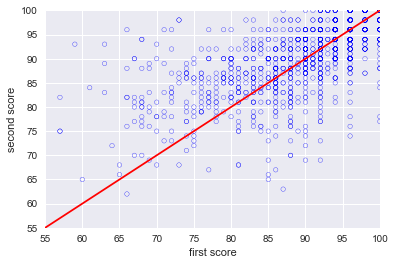

In [156]:
# Create scatter plot here.
[first_score,second_score] = list(zip(*map(lambda l: tuple(l[0]),scores_pairs_by_business.values)))
plt.scatter(first_score,second_score,s=20,facecolors='none',edgecolors='b')
plt.plot([55,100],[55,100],'r-')
plt.xlabel('first score')
plt.ylabel('second score')
plt.axis([55,100,55,100])
plt.show()

#### Question 7b

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

In [ ]:
# SOLUTION CELL
diffs = [score_pair[1]-score_pair[0] for t in scores_pairs_by_business.values for score_pair in t]
plt.hist(diffs,bins=30)
plt.show()

#### Question 7c

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in 7a? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in 7b? What do you see?

In [ ]:
q7c_answer = r"""

If the restaurants tend to improve from the first to the second inspection, 
we would expect to see the points in the scatter plot fall above the line of slope 1. 
We would also expet to see the histogram of the difference in scores to be shifted toward
positive values. Interestingly, we don't see this. The second inspection often is worse than first. 
The histogram of differences shows a unimodal distribution with a peak below 0. 
This distribution has long tails with some scores being as low as -20 and others as high as 20-30.

"""

display(Markdown(7c_answer))

## Summary of the inspections data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that may restaurants have more than one inspection a year. In the future, we may want to roll some of the information about the inspections up to the business/restaurant level and join the inspection information with the business dataframe. For example, we could make maps of inspection scores for restaurants.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and we warrant further investigation. It also makes sense to learn more about the inspection process to help us understand the connections between scores from multiple inspections. 


# Violations Data

Lastly, we will explore the `vio` data set. As with the first two DataFreames, we want to determine the granularity of the data, the number of records and fields, and we want to investigate the fields (variables). 

### Question 8

#### Question 8a

How many records are in `vio`? What does this tell you about the granularity of `vio` in comparison to `bus` and `ins`? 

In [ ]:
q8a_answer = r"""

The violations file has more records than the inspection file.


"""
display(Markdown(q8a_answer))

In [ ]:
print("Number of business records:", len(bus))
print("Number of inspection records:", len(ins))
print("Number of violations records:", len(vio))

Let's examine the first few rows of `vio` to see if that provides addtional information about the granularity.

In [ ]:
vio.head(10)

Just looking at the first few records in `vio` we see that each inspection has multiple entries. Reading the descriptions, we see that if corrected, a date is listed in the description within square brackets. This date appears to be the same date as the inspection.
We will consider how to derive features from the `description` field when we cover the topic of regular expressions.

#### Question 8b

As with the inspections data frame, let's examine only records for 2016. 
Recall that the dates in the `ins` file are formatted as strings such as 20160503. As before, convert these dates into a datetime object called `new_date`, and create a new colum called `year` that contains the year only. 

In [178]:
# SOLUTION CELL
vio['new_date'] = vio['date'].apply(lambda d: pd.datetime.strptime(str(d),'%Y%m%d'))
vio['year']     = vio['new_date'].apply(lambda d: d.year)
vio2016 = vio[vio['year']==2016]

In [ ]:
_ = ok.grade('q08b')
_ = ok.backup()

## Number of violations

When we explore data, we often create new variables that we think might be useful in our analysis. For example, a variable that contains the number of violation records per inspection may be of interest. We might want to see if the number of inspections is correlated with the inspection score.  Or, we might be interested in whether the score improves on the second inspection. 

#### Question 8c
Derive a variable, `num_vio`, that contains the number of violations in a restaurant inspection.

In [188]:
# Solution 1
num_vios = (vio2016.groupby(['business_id', 'new_date']).size()
            .reset_index()
            .rename(columns={0: 'num_vio'}))
ins2016 = pd.merge(ins2016, num_vios)

# Solution 2
ins2016.drop('num_vio', axis=1, inplace=True)
num_vios = vio2016.groupby(['business_id', 'new_date']).size().rename('num_vio')
ins2016 = ins2016.join(num_vios, on=['business_id', 'new_date'])
ins2016.head()

,business_id,score,date,type,new_date,year,num_vio
0,10,82,20160503,routine,2016-05-03,2016,5
1,19,94,20160513,routine,2016-05-13,2016,3
2,24,98,20161005,routine,2016-10-05,2016,1
3,24,96,20160311,routine,2016-03-11,2016,2
4,31,84,20160816,routine,2016-08-16,2016,6


In [189]:
_ = ok.grade('q08c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw2_master.ipynb'.
Backup... 100% complete
Backup successful for user: samlau95@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw2/backups/jR9pNY
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 8d

Now that we have created this new varable, let's examine its distribution. 
Make a histogram of `num_vio` and describe its shape.

In [ ]:
# SOLUTION CELL
plt.hist(ins2016['num_vio'],bins=15)
plt.show()

In [ ]:
q8d_answer = r"""

The distribution is unimodal with a mode around 2 violations. 
The distribution is right skewed with some restaurants having 6-10 violations 
in one inspection.

"""

display(Markdown(q8d_answer))


## Summary of the violations data

Let's take stock of what we have learned about the violations data and what might be the next steps in our investigation. 

* We found that the records consist of the violations that were found on an inspection. And from inspection it seems that if a violation is corrected this information is provided in the description field.
* We also found that the distribution of the number of violations shows that some restaurants had many violations. 
* In the future, we might want to investigate the relationship between the inspection score and the number of violations. Additionally, it might be interesting to pursue possible connections between the type of violation and the score


## Submission

Congrats! You are finished with HW2. For convenience, we've included a cell below that runs all the OkPy tests.

In [ ]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()

Also, as of this writing there's a bug in OkPy where it will say:

```
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit
```

when running the cell above. Don't worry about that; if you can visit OkPy and see your submission, you've submitted the assignment.

Even if you forget to run the cell above, we'll automatically take your latest backup when grading so don't worry about that.